In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

df = pd.read_csv(url, names=columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("Shape:", df.shape)
df.info()
df.describe()

Shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [5]:
invalid_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[invalid_zero_cols] = df[invalid_zero_cols].replace(0, np.nan)
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [6]:
df[invalid_zero_cols] = df[invalid_zero_cols].fillna(df[invalid_zero_cols].mean())
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
X = df.drop(columns=['Outcome']).values
y = df['Outcome'].values

#Normalizing the data
mean = X.mean(axis=0)
std = X.std(axis=0)

X_normalized = (X - mean) / std

In [8]:
X_normalized[:, 1] *= 1.5  # Glucose
X_normalized[:, 5] *= 1.3  # BMI
X_normalized[:, 7] *= 1.2  # Age

In [9]:
n_features = X_normalized.shape[1]
w = np.zeros(n_features)
b = 0.0

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, w, b):
    z = np.dot(X, w) + b
    return sigmoid(z)

def compute_loss(y, y_pred):
    epsilon = 1e-8  # avoid log(0)
    return -np.mean(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))

In [11]:
def compute_gradients(X, y, y_pred):
    n = X.shape[0]
    error = y_pred - y
    dw = np.dot(X.T, error) / n
    db = np.sum(error) / n
    return dw, db

In [12]:
# Hyperparameters
learning_rate = 0.1
epochs = 1000
losses = []

for epoch in range(epochs):
    y_pred = predict(X_normalized, w, b)
    
    loss = compute_loss(y, y_pred)
    losses.append(loss)
    
    dw, db = compute_gradients(X_normalized, y, y_pred)
    
    w -= learning_rate * dw
    b -= learning_rate * db
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.4699
Epoch 200, Loss: 0.4651
Epoch 300, Loss: 0.4645
Epoch 400, Loss: 0.4644
Epoch 500, Loss: 0.4644
Epoch 600, Loss: 0.4644
Epoch 700, Loss: 0.4644
Epoch 800, Loss: 0.4644
Epoch 900, Loss: 0.4644


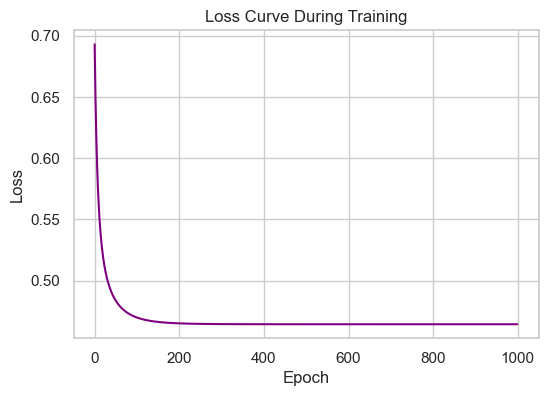

In [13]:
plt.figure(figsize=(6, 4))
plt.plot(losses, color='purple')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve During Training")
plt.grid(True)
plt.show()

In [14]:
y_pred_final = predict(X_normalized, w, b)
y_pred_labels = (y_pred_final >= 0.48).astype(int)

accuracy = np.mean(y_pred_labels == y)
print(f"Final Accuracy: {accuracy:.3f}")

Final Accuracy: 0.775


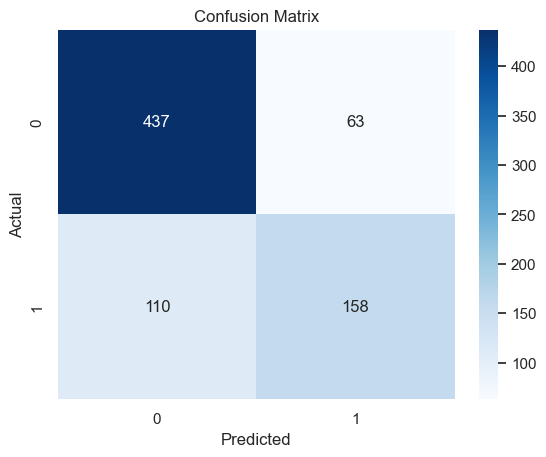

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()